 # **Introducción a la Estadística Descriptiva**

 La estadística descriptiva es una rama fundamental de la estadística que se ocupa de la recolección, organización, análisis y presentación de datos. En esta era de información masiva, la capacidad de comprender y describir datos de manera efectiva se ha vuelto una habilidad esencial para cualquier científico de datos.

 A diferencia de la estadística inferencial, que busca hacer predicciones y generalizaciones sobre una población basándose en una muestra, la estadística descriptiva se centra en describir y resumir las características principales de un conjunto de datos.

 ## **1. Variables Cualitativas y Cuantitativas**

 El primer paso para cualquier análisis estadístico es comprender la naturaleza de los datos con los que estamos trabajando. La clasificación de variables en cualitativas y cuantitativas es fundamental porque determina qué tipos de análisis y visualizaciones son apropiados para nuestros datos.

 ### **1.1 Variables Cualitativas (Categóricas)**

 * **Nominales:**
   - No tienen un orden natural
   - Ejemplos: género, color de ojos, nacionalidad
   - Medidas descriptivas: moda, frecuencias

 * **Ordinales:**
   - Tienen un orden o ranking natural
   - Ejemplos: nivel educativo, satisfacción del cliente
   - Medidas descriptivas: mediana, moda, frecuencias

### **1.2 Variables Cuantitativas (Numéricas)**

 * **Discretas:**
   - Toman valores enteros o contables
   - Ejemplos: número de hijos, número de estudiantes
   - Medidas descriptivas: media, mediana, moda, varianza

 * **Continuas:**
   - Pueden tomar cualquier valor dentro de un intervalo
   - Ejemplos: altura, peso, temperatura
   - Medidas descriptivas: media, mediana, moda, varianza, desviación estándar

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Crear datos de ejemplo
np.random.seed(42)
n_students = 200
data = {
    'edad': np.random.normal(20, 2, n_students),  # Cuantitativa continua
    'semestre': np.random.randint(1, 11, n_students),  # Cuantitativa discreta
    'genero': np.random.choice(['M', 'F'], n_students),  # Cualitativa nominal
    'nivel_satisfaccion': np.random.choice(['Bajo', 'Medio', 'Alto'], n_students),  # Cualitativa ordinal
    'num_cursos': np.random.poisson(3, n_students)  # Cuantitativa discreta
}

df = pd.DataFrame(data)

# Mostrar información sobre las variables
print("Análisis de Variables:")
print("\nVariables Cuantitativas:")
print(df.describe())

print("\nVariables Cualitativas:")
for col in ['genero', 'nivel_satisfaccion']:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

Análisis de Variables:

Variables Cuantitativas:
             edad    semestre  num_cursos
count  200.000000  200.000000  200.000000
mean    19.918458    5.570000    2.925000
std      1.862008    3.013387    1.739108
min     14.760510    1.000000    0.000000
25%     18.589745    3.000000    2.000000
50%     19.991616    5.000000    3.000000
75%     21.001705    8.000000    4.000000
max     25.440338   10.000000    8.000000

Variables Cualitativas:

Distribución de genero:
genero
M    104
F     96
Name: count, dtype: int64

Distribución de nivel_satisfaccion:
nivel_satisfaccion
Medio    67
Alto     67
Bajo     66
Name: count, dtype: int64


 ## **2. Medidas de Tendencia Central**

 Las medidas de tendencia central nos proporcionan un valor representativo alrededor del cual se agrupan los datos. Su importancia radica en que nos permiten caracterizar una distribución mediante un único valor.

 ### **2.1 Variables Cualitativas**

 Para variables cualitativas (categóricas), las principales medidas de tendencia central se muestran a continuación.

 #### **2.1.1 Moda**
 - Definición: es la categoría o valor que aparece con mayor frecuencia.
 - Ventajas:
   - Es la única medida aplicable a variables cualitativas nominales
   - Fácil de calcular y comprender
   - No se ve afectada por valores extremos
 - Limitaciones:
   - Puede no ser única (distribución bimodal o multimodal)
   - No considera toda la información de la distribución


Moda de datos cualitativos:
0    azul
Name: color_favorito, dtype: object


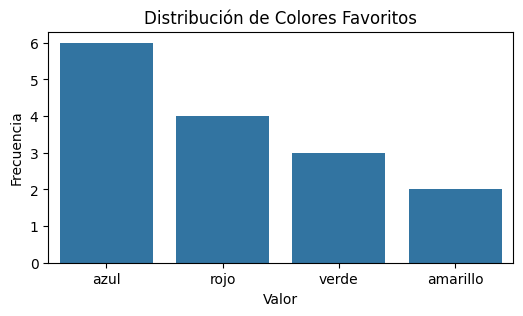

In [ ]:
# Ejemplo con datos cualitativos
datos_cualitativos = pd.DataFrame({
    'color_favorito': ['azul', 'rojo', 'verde', 'azul', 'amarillo', 'azul', 'rojo', 'verde',
                      'azul', 'rojo', 'azul', 'verde', 'amarillo', 'azul', 'rojo']
})

# Calcular y mostrar la moda
print("Moda de datos cualitativos:")
print(datos_cualitativos['color_favorito'].mode())

# Visualizar distribución
plt.figure(figsize=(6, 3))
sns.countplot(data=datos_cualitativos, x='color_favorito')
plt.title('Distribución de Colores Favoritos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.show()

La imagen muestra un gráfico de barras. Este gráfico representa la frecuencia con la que diferentes colores fueron seleccionados como favoritos en algún tipo de encuesta o estudio. En el eje horizontal se encuentran los colores: azul, rojo, verde y amarillo. El eje vertical indica la frecuencia, es decir, cuántas personas seleccionaron cada color.
De acuerdo con el gráfico:

- El azul es el color más popular, con aproximadamente 6 personas seleccionándolo. Esto permite concluir que azul es la moda
- Hay una clara tendencia descendente en la popularidad, con cada color recibiendo menos votos que el anterior
- El azul tiene tres veces más preferencia que el amarillo, mostrando una diferencia significativa entre el color más y menos popular

Este tipo de visualización es útil para entender la forma y distribución de conjuntos de datos cualitativos.

 ### **2.2 Variables Cuantitativas**

 Para variables cuantitativas, disponemos de tres medidas principales.

 #### **2.2.1 Media Aritmética (Promedio)**
 - Definición: es la suma de todos los valores dividida por el número total de observaciones.
 - Propiedades:
  - Es única para cada conjunto de datos
  - Considera todos los valores en el cálculo
  - Es sensible a valores extremos
  - La suma de las desviaciones respecto a la media es cero
 - Aplicaciones:
  - Ideal para distribuciones simétricas
  - Útil en análisis posteriores (inferencia estadística)

#### **2.2.2 Mediana**
 - Definición: es el valor que divide al conjunto ordenado de datos en dos partes iguales.
 - Propiedades:
  - No se ve afectada por valores extremos
  - Útil para distribuciones asimétricas
  - Apropiada para variables ordinales

#### **2.2.3 Moda**
 - Definición: es la categoría o valor que aparece con mayor frecuencia.
 - Particularidades en datos cuantitativos:
  - Puede no existir en datos continuos
  - Útil para identificar valores típicos
  - Puede indicar la presencia de subpoblaciones

Media: 28.75
Mediana: 29.50
Moda: 30.00


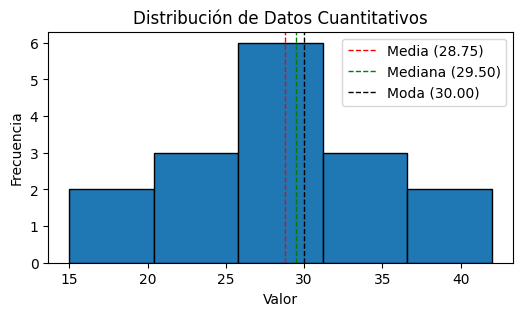

In [ ]:
# Crear datos cuantitativos
datos_cuantitativos = np.array([15, 18, 21, 24, 25, 26, 28, 29, 30, 30, 31, 32, 35, 36, 38, 42])

# Calcular medidas de tendencia central
media = np.mean(datos_cuantitativos)
mediana = np.median(datos_cuantitativos)
moda = stats.mode(datos_cuantitativos).mode

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")

# Visualizar distribución con las medidas
plt.figure(figsize=(6, 3))
plt.hist(datos_cuantitativos, bins='auto', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media ({media:.2f})')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label=f'Mediana ({mediana:.2f})')
plt.axvline(moda, color='black', linestyle='dashed', linewidth=1, label=f'Moda ({moda:.2f})')
plt.legend()
plt.title('Distribución de Datos Cuantitativos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.show()

La imagen muestra un histograma. Este gráfico representa la frecuencia de diferentes valores en un conjunto de datos. El eje horizontal muestra los valores de los datos, que van aproximadamente desde 15 hasta 40. El eje vertical indica la frecuencia o número de ocurrencias. La distribución está dividida en rangos o "bins" con anchos iguales. Tres líneas verticales marcan medidas de tendencia central:

- Línea roja punteada: Media (28.75)
- Línea verde punteada: Mediana (29.50)
- Línea negra punteada: Moda (30.00)
- La barra más alta (con frecuencia 6) corresponde al rango que contiene el valor 30, confirmando que este es el rango modal
- La media (28.75) es ligeramente menor que la mediana (29.50), lo que podría indicar una muy ligera asimetría negativa (cola hacia la izquierda).

Este tipo de visualización es útil para entender la forma, centralidad y dispersión de conjuntos de datos cuantitativos, permitiendo identificar rápidamente patrones, valores atípicos y la naturaleza general de la distribución.

 ## **3. Medidas de Dispersión**

 Las medidas de dispersión nos indican qué tan esparcidos están los datos respecto a las medidas de tendencia central. Las principales son:

### **3.1 Rango**
 - Definición: diferencia entre el valor máximo y mínimo.
 - Ventajas:
  - Fácil de calcular
  - Intuitivo
- Limitaciones:
  - Muy sensible a valores extremos
  - No considera la distribución interna de los datos

### **3.2 Varianza**
 - Definición: promedio de los cuadrados de las desviaciones respecto a la media.
 - Propiedades:
  - Siempre es no negativa
  - Se expresa en unidades al cuadrado
  - Considera todos los valores
 - Interpretación:
  - Mayor valor indica mayor dispersión
  - Útil para comparaciones relativas

### **3.3 Desviación Estándar**
 - Definición: raiz cuadrada de la varianza.
 - Ventajas:
  - Se expresa en las mismas unidades que los datos originales
  - Interpretación más intuitiva
 - Aplicaciones:
  - Regla empírica para distribuciones normales
  - Detección de valores atípicos

In [ ]:
# Calcular medidas de dispersión
rango = np.max(datos_cuantitativos) - np.min(datos_cuantitativos)
varianza = np.var(datos_cuantitativos, ddof=1)  # ddof=1 para varianza muestral
desv_est = np.std(datos_cuantitativos, ddof=1)

print(f"Rango: {rango}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desv_est:.2f}")

Rango: 27
Varianza: 52.07
Desviación estándar: 7.22


 ## **4. Cuantiles y Percentiles**

 Los cuantiles son valores que dividen un conjunto ordenado de datos en partes iguales, por ejemplo:

 - Cuartiles: dividen los datos en 4 partes iguales
 - Quintiles: dividen los datos en 5 partes iguales
 - Deciles: dividen los datos en 10 partes iguales
 - Percentiles: dividen los datos en 100 partes iguales

### **4.1 Cuartiles en Detalle**
 - Primer Cuartil (Q1): 25% de los datos están por debajo
 - Segundo Cuartil (Q2): 50 % de los datos están por debajo, coincide con la mediana
 - Tercer Cuartil (Q3): 75% de los datos están por debajo
 - Rango Intercuartílico (IQR): Q3 - Q1
  - Base para la detección de valores atípicos


In [ ]:
# Calcular cuartiles
Q1 = np.percentile(datos_cuantitativos, 25)
Q2 = np.percentile(datos_cuantitativos, 50)
Q3 = np.percentile(datos_cuantitativos, 75)
IQR = Q3 - Q1

print('Cuartiles:')
print(f"\nPrimer cuartil (Q1): {Q1}")
print(f"Segundo cuartil (Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")

# Calcular percentiles específicos
print('\nPercentiles:')
print()
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    valor = np.percentile(datos_cuantitativos, p)
    print(f"Percentil {p}: {valor}")

Cuartiles:

Primer cuartil (Q1): 24.75
Segundo cuartil (Q2): 29.5
Tercer cuartil (Q3): 32.75
Rango intercuartílico (IQR): 8.0

Percentiles:

Percentil 10: 19.5
Percentil 25: 24.75
Percentil 50: 29.5
Percentil 75: 32.75
Percentil 90: 37.0


 ## **5. Valores Atípicos (Outliers)**

 Los valores atípicos son observaciones que se desvían significativamente de la distribución de los datos. Existen dos métodos principales para su detección.

### **5.1 Método del Rango Intercuartílico (IQR)**
- Límite inferior = Q1 - 1.5×IQR
- Límite superior = Q3 + 1.5×IQR
- Valores fuera de estos límites se consideran atípicos

### **5.2 Método de la Puntuación z (z-score)**
- Z = (x - μ)/σ (donde x es cada dato, μ es el promedio, σ la desviación estandar)
- Valores con |Z| > 3 suelen considerarse atípicos
- Limitación: Asume normalidad

### **5.3 Tratamiento de Valores Atípicos**
 - Verificación
  - Comprobar errores de medición o registro
  - Validar si son valores posibles
 - Decisiones
  - Mantener si son valores válidos
  - Corregir si hay errores
  - Eliminar si son errores no corregibles

### **5.4 Impacto en el Análisis**
 - Afectan los valores de las medidas de tendencia central y medidas de dispersión
 - Pueden llevar a realizar conclusiones erroneas
 - En otros casos pueden ser datos valiosos o que se desean detectar


Outliers detectados (método IQR):
[ 5 85 90]
Límite inferior: 8.00
Límite superior: 52.00

Outliers detectados (método Z-score):
[]


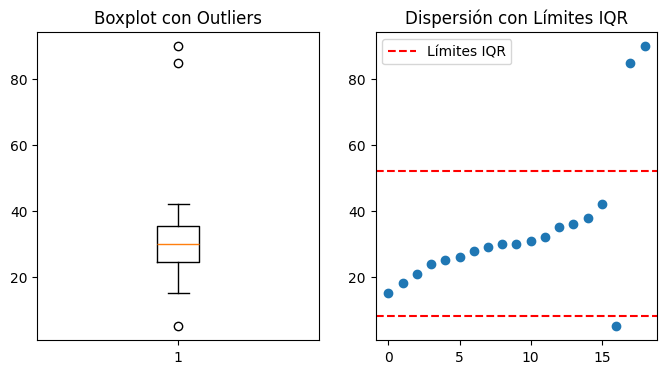

In [ ]:
# Funciones para detectar outliers
def detectar_outliers_iqr(datos):
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]
    return outliers, limite_inferior, limite_superior

def detectar_outliers_zscore(datos, umbral=3):
    z_scores = stats.zscore(datos)
    outliers = datos[np.abs(z_scores) > umbral]
    return outliers

# Crear datos con outliers
datos_con_outliers = np.append(datos_cuantitativos, [5, 85, 90])

# Detectar outliers con ambos métodos
outliers_iqr, lim_inf, lim_sup = detectar_outliers_iqr(datos_con_outliers)
outliers_zscore = detectar_outliers_zscore(datos_con_outliers)

print("Outliers detectados (método IQR):")
print(outliers_iqr)
print(f"Límite inferior: {lim_inf:.2f}")
print(f"Límite superior: {lim_sup:.2f}")

print("\nOutliers detectados (método Z-score):")
print(outliers_zscore)

# Visualizar datos con outliers
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.boxplot(datos_con_outliers)
plt.title('Boxplot con Outliers')

plt.subplot(1, 2, 2)
plt.scatter(range(len(datos_con_outliers)), datos_con_outliers)
plt.axhline(y=lim_sup, color='r', linestyle='--', label='Límites IQR')
plt.axhline(y=lim_inf, color='r', linestyle='--')
plt.legend()
plt.title('Dispersión con Límites IQR')
plt.show()

La imagen muestra dos gráficos estadísticos que representan la distribución de un mismo conjunto de datos.


**Gráfico izquierdo - "Boxplot":** es un diagrama de caja y bigotes que muestra la distribución central de los datos. La caja central (entre aproximadamente 25-35) representa el rango intercuartílico (IQR), que contiene el 50% central de los datos. La línea horizontal dentro de la caja indica la mediana (aproximadamente 30). Los "bigotes" se extienden hasta los valores mínimo y máximo no atípicos. Hay tres puntos marcados como círculos (outliers o valores atípicos), dos valores muy altos (aproximadamente 85 y 90) y un valor bajo (aproximadamente 5).


**Gráfico derecho - "Dispersión con Límites IQR":** muestra los mismos datos como un diagrama de dispersión ordenado. Cada punto azul representa un valor individual. Las líneas rojas punteadas indican los límites del rango intercuartílico (IQR). La mayoría de los valores se concentran entre estas líneas (aproximadamente 8-52). Se observan claramente dos valores muy por encima del límite superior (aproximadamente 83 y 88).

Esta representación es particularmente útil para identificar valores inusuales en conjuntos de datos y comprender la estructura general de la distribución de los valores.

 ## **6. Valores nulos o faltantes**

 Los valores nulos o faltantes son una realidad común en los conjuntos de datos del mundo real. Pueden surgir por diversas razones:
 * Errores en la recolección de datos
 * Falta de respuesta en encuestas
 * Fallas en sensores o sistemas
 * Datos no aplicables
 * Problemas de integración de datos

In [ ]:
# Creamos un dataset de ejemplo
np.random.seed(42)
data = {
    'edad': [25, 30, np.nan, 45, 35, np.nan, 28, 33],
    'salario': [50000, np.nan, 75000, 80000, np.nan, 65000, 55000, 70000],
    'experiencia': [2, 5, np.nan, 15, 7, 10, np.nan, 6]
}
df = pd.DataFrame(data)

print("Dataset original:")
print(df)
print("\nInformación sobre valores nulos:")
print(df.info())

Dataset original:
   edad  salario  experiencia
0  25.0  50000.0          2.0
1  30.0      NaN          5.0
2   NaN  75000.0          NaN
3  45.0  80000.0         15.0
4  35.0      NaN          7.0
5   NaN  65000.0         10.0
6  28.0  55000.0          NaN
7  33.0  70000.0          6.0

Información sobre valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   edad         6 non-null      float64
 1   salario      6 non-null      float64
 2   experiencia  6 non-null      float64
dtypes: float64(3)
memory usage: 320.0 bytes
None


 ### **6.2 Técnicas de Tratamiento de Valores Nulos**

 #### **6.2.1 Eliminación**
 - Eliminación por filas: se suele eliminar las filas con valores nulos si las mismas son meor al 5% del conteo total de filas
 - Eliminación por columnas: se suele no considerar una variable cuando contiene mas del 5% de datos nulos, sin embargo este umbral depende del caso de uso

#### **6.2.2 Imputación Simple**
 - Media/Mediana/Moda
 - Valor constante
 - Interpolación

In [ ]:
# Ejemplo de eliminación de filas con valores nulos
df_dropped = df.dropna()
print("Dataset después de eliminar filas con valores nulos:")
print(df_dropped)

Dataset después de eliminar filas con valores nulos:
   edad  salario  experiencia
0  25.0  50000.0          2.0
3  45.0  80000.0         15.0
7  33.0  70000.0          6.0


In [ ]:
# Imputación con media
df_mean = df.fillna(df.mean())
print("\nDataset después de imputar con la media:")
print(df_mean)

# Imputación con mediana
df_median = df.fillna(df.median())
print("\nDataset después de imputar con la mediana:")
print(df_median)


Dataset después de imputar con la media:
        edad       salario  experiencia
0  25.000000  50000.000000          2.0
1  30.000000  65833.333333          5.0
2  32.666667  75000.000000          7.5
3  45.000000  80000.000000         15.0
4  35.000000  65833.333333          7.0
5  32.666667  65000.000000         10.0
6  28.000000  55000.000000          7.5
7  33.000000  70000.000000          6.0

Dataset después de imputar con la mediana:
   edad  salario  experiencia
0  25.0  50000.0          2.0
1  30.0  67500.0          5.0
2  31.5  75000.0          6.5
3  45.0  80000.0         15.0
4  35.0  67500.0          7.0
5  31.5  65000.0         10.0
6  28.0  55000.0          6.5
7  33.0  70000.0          6.0


 ## **7. Reporte Estadístico Completo**

 A continuación, se presenta una función que genera un reporte estadístico completo para cualquier conjunto de datos.

In [ ]:
def reporte_estadistico(datos):
    print("REPORTE ESTADÍSTICO COMPLETO")
    print("-" * 40)

    # Medidas de tendencia central
    print("\nMedidas de Tendencia Central:")
    print(f"Media: {np.mean(datos):.2f}")
    print(f"Mediana: {np.median(datos):.2f}")
    print(f"Moda: {stats.mode(datos).mode}")

    # Medidas de dispersión
    print("\nMedidas de Dispersión:")
    print(f"Rango: {np.ptp(datos):.2f}")
    print(f"Varianza: {np.var(datos, ddof=1):.2f}")
    print(f"Desviación Estándar: {np.std(datos, ddof=1):.2f}")
    print(f"Coeficiente de Variación: {(np.std(datos, ddof=1)/np.mean(datos)*100):.2f}%")

    # Cuartiles
    print("\nCuartiles:")
    for i, q in enumerate([25, 50, 75]):
        print(f"Q{i+1} (P{q}): {np.percentile(datos, q):.2f}")

    # Outliers
    outliers_iqr, lim_inf, lim_sup = detectar_outliers_iqr(datos)
    print("\nAnálisis de Outliers:")
    print(f"Número de outliers detectados (IQR): {len(outliers_iqr)}")
    if len(outliers_iqr) > 0:
        print("Valores outliers:", outliers_iqr)

# Generar reportes
print("Reporte para datos originales:")
reporte_estadistico(datos_cuantitativos)

print("\nReporte para datos con outliers:")
reporte_estadistico(datos_con_outliers)

Reporte para datos originales:
REPORTE ESTADÍSTICO COMPLETO
----------------------------------------

Medidas de Tendencia Central:
Media: 28.75
Mediana: 29.50
Moda: 30

Medidas de Dispersión:
Rango: 27.00
Varianza: 52.07
Desviación Estándar: 7.22
Coeficiente de Variación: 25.10%

Cuartiles:
Q1 (P25): 24.75
Q2 (P50): 29.50
Q3 (P75): 32.75

Análisis de Outliers:
Número de outliers detectados (IQR): 0

Reporte para datos con outliers:
REPORTE ESTADÍSTICO COMPLETO
----------------------------------------

Medidas de Tendencia Central:
Media: 33.68
Mediana: 30.00
Moda: 30

Medidas de Dispersión:
Rango: 85.00
Varianza: 433.23
Desviación Estándar: 20.81
Coeficiente de Variación: 61.79%

Cuartiles:
Q1 (P25): 24.50
Q2 (P50): 30.00
Q3 (P75): 35.50

Análisis de Outliers:
Número de outliers detectados (IQR): 3
Valores outliers: [ 5 85 90]


 ## **8. Distribuciones**

 Las distribuciones estadísticas constituyen uno de los pilares fundamentales en el análisis de datos y la inferencia estadística. Representan la forma en que los valores de una variable se distribuyen en un conjunto de datos, proporcionándonos una "fotografía matemática" de cómo se comporta un fenómeno.
 Para comprender las distribuciones, podemos comenzar con un ejemplo cotidiano: imagine que medimos la altura de todos los estudiantes de una universidad. Algunos serán muy altos, otros muy bajos, pero la mayoría probablemente se agrupará alrededor de una altura promedio. Esta tendencia natural a agruparse de cierta manera es lo que llamamos una distribución. En estadística, las distribuciones pueden ser:
 - Según su naturaleza:
  - Empíricas: basadas en datos observados reales
  - Teóricas: modelos matemáticos que describen comportamientos ideales

 - Según el tipo de variable:
  - Discretas: cuando la variable solo puede tomar valores específicos o enteros(como número de hijos)
  - Continuas: cuando la variable puede tomar cualquier valor dentro de un rango (como peso o altura)

Las distribuciones nos permiten:
 - Describir patrones en los datos
 - Hacer predicciones sobre futuros eventos
 - Calcular probabilidades
 - Tomar decisiones basadas en datos
 - Identificar valores inusuales o atípicos

El estudio de las distribuciones es esencial porque nos proporciona las herramientas necesarias para:
 - Seleccionar métodos estadísticos apropiados
 - Validar supuestos en análisis estadísticos
 - Realizar inferencias sobre poblaciones
 - Construir intervalos de confianza
 - Realizar pruebas de hipótesis

La mejor forma de entender el concepto de distribuciones es a través de la visualización de datos. La visualización de datos dependera del tipo de varaible a analizar como veremos a continuación.

In [ ]:
# Crear datos de ejemplo
np.random.seed(42)
n_students = 1000
data = {
    'edad': np.random.normal(20, 2, n_students),  # Cuantitativa continua
    'semestre': np.random.randint(1, 11, n_students),  # Cuantitativa discreta
    'genero': np.random.choice(['M', 'F'], n_students),  # Cualitativa nominal
    'nivel_satisfaccion': np.random.choice(['Bajo', 'Medio', 'Alto'], n_students),  # Cualitativa ordinal
    'num_cursos': np.random.poisson(5, n_students)  # Cuantitativa discreta
}

df = pd.DataFrame(data)

 ### **8.1 Visualización de Variables Cualitativas**
 #### **8.1.1 Gráficos de barras**
 Resumen y comparan los datos categóricos mediante longitudes de barras proporcionales a las frecuencias (conteo) de cada categoria.

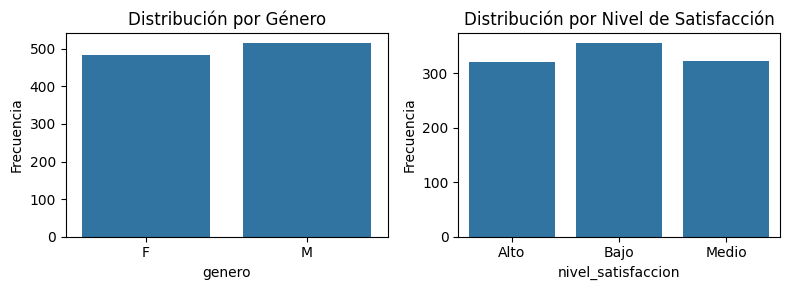

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(8, 3))

# Gráfico de barras para género
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='genero')
plt.title('Distribución por Género')
plt.ylabel('Frecuencia')

# Gráfico de barras para nivel de satisfacción
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='nivel_satisfaccion')
plt.title('Distribución por Nivel de Satisfacción')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de barras lado a lado que representan distribuciones de frecuencias.

**Gráfico izquierdo - "Distribución por Género":** muestra la distribución de participantes por género Categorías: F (Femenino) y M (Masculino). El género masculino tiene mayor frecuencia (aproximadamente 500). El género femenino tiene una frecuencia ligeramente menor (aproximadamente 480).

**Gráfico derecho - "Distribución por Nivel de Satisfacción":** muestra la distribución según niveles de satisfacción. Categorías: Alto, Bajo y Medio. El nivel "Bajo" tiene la mayor frecuencia (aproximadamente 350). Los niveles "Alto" y "Medio" tienen frecuencias similares (aproximadamente 310-320).

**Insights relevantes**

- La distribución por género es relativamente equilibrada, con una ligera mayoría masculina.
- En cuanto a satisfacción, predomina el nivel "Bajo", lo que indica una tendencia preocupante en la percepción general.
- La distribución casi uniforme entre los tres niveles de satisfacción sugiere opiniones divididas, aunque con inclinación hacia la insatisfacción.

 #### **8.1.2 Gráficos de pastel**
 Resumen y representan los porcentajes y proporciones de cada categoria.

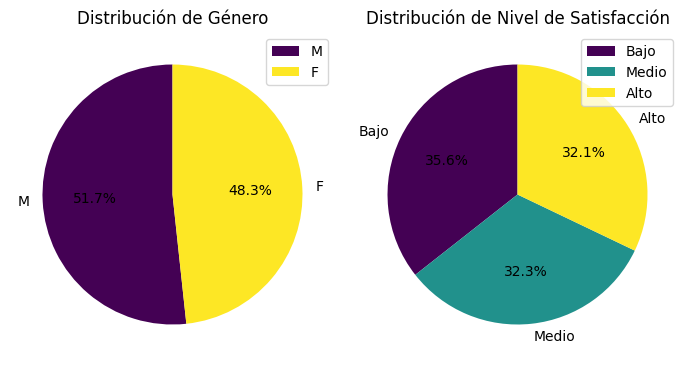

In [ ]:
# Crear visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Gráfico de pastel para genero
df['genero'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[0], legend=True)
axes[0].set_title('Distribución de Género')
axes[0].set_ylabel('')

# Gráfico de pastel para nivel de satisfaccion
df['nivel_satisfaccion'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[1], legend=True)
axes[1].set_title('Distribución de Nivel de Satisfacción')
axes[1].set_ylabel('')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La imagen muestra dos gráficos circulares (pie charts) que representan distribuciones porcentuales.

**Gráfico izquierdo - "Distribución de Género":** muestra la distribución entre dos géneros: Masculino (M): 51.7% (color morado) y Femenino (F): 48.3% (color amarillo).

**Gráfico derecho - "Distribución de Nivel de Satisfacción":** muestra la distribución entre tres niveles: Bajo: 35.6% (color morado), Medio: 32.3% (color verde azulado) y Alto: 32.1% (color amarillo).

**Insights relevantes**

- La distribución por género es bastante equilibrada, con una ligera mayoría masculina.
- Los niveles de satisfacción están distribuidos de manera relativamente uniforme, con una tendencia ligeramente mayor hacia el nivel "Bajo".

 ### **8.2 Visualización de Variables Cuantitativas**
 #### **8.2.1 Histogramas**
 Parecido a un gráfico de barras, pero se usan para mostrar la frecuencia (conteo) de valores en diferentes intervalos. Se tiene una barra (bin) por cada intervalo de valores, la altura de cada barra indica cuántos datos caen dentro de ese intervalo.

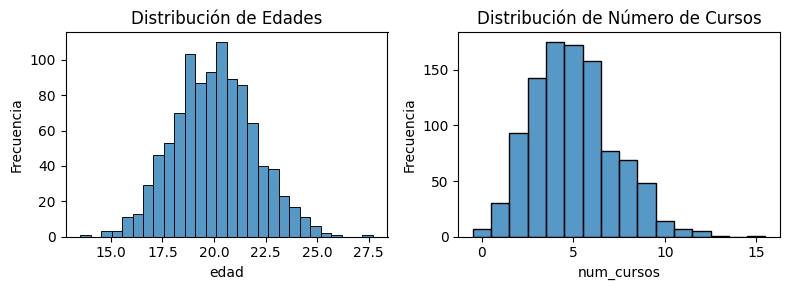

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(8, 3))

# Histograma para edad
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='edad')
plt.title('Distribución de Edades')
plt.ylabel('Frecuencia')

# Histograma para número de cursos
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='num_cursos', discrete=True)
plt.title('Distribución de Número de Cursos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La imagen muestra dos histogramas que representan distribuciones de frecuencias.

**Gráfico izquierdo - "Distribución de Edades":** muestra la distribución de edades en un grupo. El rango de edades va desde aproximadamente 15 hasta 28 años. La mayor concentración se observa alrededor de 20-22 años. La forma sugiere una distribución aproximadamente normal. El pico máximo (frecuencia ~110) se ubica cerca de los 21 años.

**Gráfico derecho - "Distribución de Número de Cursos":** muestra la distribución del número de cursos tomados. El rango va desde 0 hasta aproximadamente 15 cursos. La mayor concentración está entre 4-7 cursos. El pico máximo (frecuencia ~170) se encuentra en 5-6 cursos.

**Insights relevantes**

- Ambas distribuciones muestran formas aproximadamente normales, típicas de datos demográficos y educativos.
- La población estudiada parece ser principalmente de jóvenes adultos universitarios, considerando el rango de edades centrado en los 21 años.
- La mayoría de las personas han tomado entre 4-7 cursos, lo que podría indicar estudiantes en etapas intermedias de sus programas educativos.
- Hay pocos casos extremos (muy jóvenes o mayores; muy pocos o muchos cursos), lo que sugiere una población relativamente homogénea.

#### **8.2.1.1 Normalización de histogramas**

 Es el proceso de escalar los valores de las frecuencias y sin alterar la forma del histograma. Existen varios tipos de normalización.

- **Normalización por Densidad:** esta técnica ajusta las alturas de los bines para que la suma de sus áreaa sea igual a 1.
- **Normalización de Probabilidad:** esta técnica ajusta las alturas de los bines para que la suma de sus alturas sea igual a 1.

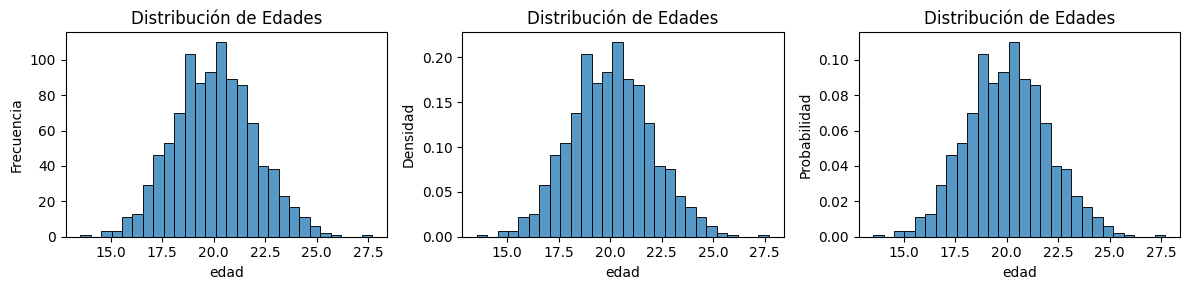

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(12, 3))

# Histograma para edad frecuencia
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='edad', stat='count')
plt.title('Distribución de Edades')
plt.ylabel('Frecuencia')

# Histograma para edad densidad
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='edad', stat='density')
plt.title('Distribución de Edades')
plt.ylabel('Densidad')

# Histograma para edad probabilidad
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='edad', stat='probability')
plt.title('Distribución de Edades')
plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()

La imagen muestra tres histogramas de la misma distribución de edades, pero representados con diferentes escalas en el eje vertical:

- Histograma izquierdo - "Distribución de Edades" (Frecuencia)

 - Muestra las frecuencias absolutas (conteos)
 - El eje Y indica el número de personas en cada rango de edad
 - El pico máximo alcanza aproximadamente 110 personas en torno a los 21-22 años

- Histograma central - "Distribución de Edades" (Densidad)

 - Muestra la misma distribución en términos de densidad
 - El eje Y representa la densidad de probabilidad
 - El pico máximo es aproximadamente 0.21 en el mismo rango de edad

- Histograma derecho - "Distribución de Edades" (Probabilidad)

 - Muestra la misma distribución en términos de probabilidad
 - El eje Y indica la probabilidad de cada rango de edad
 - El pico máximo es aproximadamente 0.11

 #### **8.2.2 Kernel density estimate plot (kdeplot)**
Es un tipo de gráfico que visualiza la distribución de un conjunto de datos mediante la estimación de la función de densidad de probabilidad (sección 10). En lugar de utilizar barras como en un histograma, el kdeplot utiliza curvas suavizadas para representar la distribución.

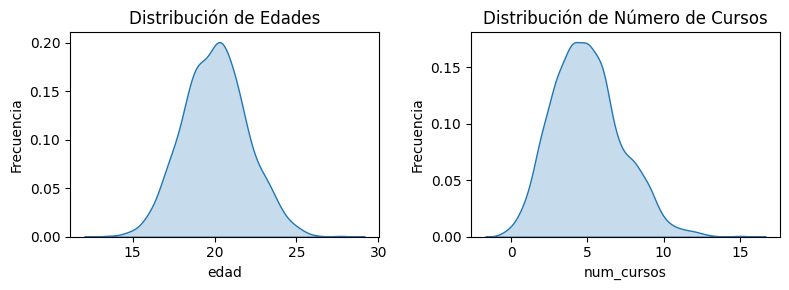

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(8, 3))

# Histograma para edad
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x='edad', fill=True)
plt.title('Distribución de Edades')
plt.ylabel('Frecuencia')

# Histograma para número de cursos
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='num_cursos', fill=True)
plt.title('Distribución de Número de Cursos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En la imagen se muestran un gráfico que combina un histograma un kdeplot

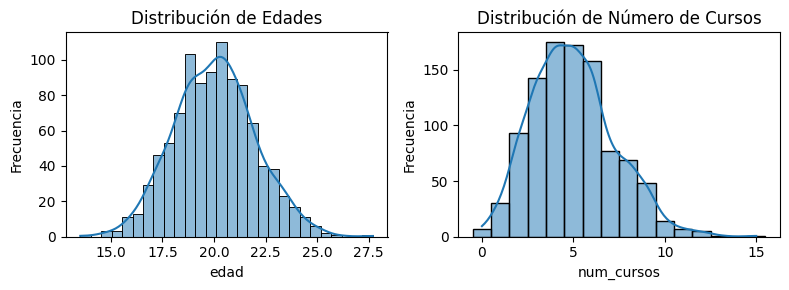

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(8, 3))

# Histograma para edad
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='edad', kde=True)
plt.title('Distribución de Edades')
plt.ylabel('Frecuencia')

# Histograma para número de cursos
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='num_cursos', discrete=True, kde=True)
plt.title('Distribución de Número de Cursos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

 #### **8.2.3 Gráficos de cajas**
 Este tipo de gráfico permite representar los datos a través de su rango intercuartil, cuartiles, y atípicos. La caja representa el rango intercuartil, es decir cada linea representa los cuartiles Q1, Q2 (mediana), y Q3. Los bigotes son las lineas mas extremas y se extienden hasta 1.5 veces el IQR desde Q1 y Q3. Los puntos anteriores y posteriores a los bigotes se consideran valores atípicos.

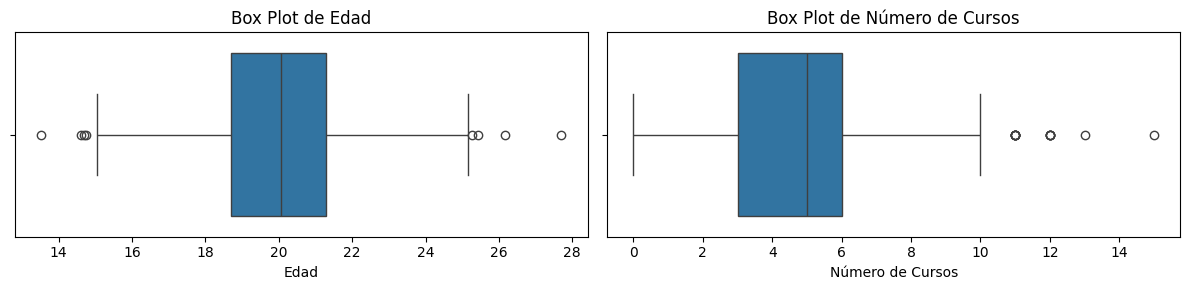

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(12, 3))

# Box plot para edad
plt.subplot(1, 2, 1)
sns.boxplot(x='edad', data=df)
plt.title('Box Plot de Edad')
plt.xlabel('Edad')

# Box plot para edad
plt.subplot(1, 2, 2)
sns.boxplot(x='num_cursos', data=df)
plt.title('Box Plot de Número de Cursos')
plt.xlabel('Número de Cursos')

plt.tight_layout()
plt.show()

La imagen muestra dos diagramas de caja y bigotes (box plots).

**Gráfico izquierdo - "Box Plot de Edad":** muestra la distribución de edades
La caja central (rango intercuartílico) se extiende aproximadamente desde 19 hasta 22 años. La línea vertical dentro de la caja (mediana) está cerca de los 20 años. Los "bigotes" se extienden aproximadamente de 14 a 25 años. Hay varios valores atípicos (outliers) representados como círculos, tanto por debajo de 14 años como por encima de 25 años.

**Gráfico derecho - "Box Plot de Número de Cursos":** muestra la distribución del número de cursos tomados. La caja central se extiende aproximadamente desde 3 hasta 6 cursos. La mediana está cerca de 5 cursos. Los "bigotes" se extienden aproximadamente de 0 a 9 cursos. Hay varios valores atípicos por encima de 9 cursos, llegando hasta 14 cursos.

**Insights relevantes**

- La distribución de edades está centrada alrededor de 20 años, confirmando que se trata predominantemente de una población universitaria joven.
- La mayoría de los estudiantes han tomado entre 3-6 cursos, pero hay casos excepcionales con hasta 14 cursos.
- Los outliers en ambas distribuciones sugieren la presencia de algunos estudiantes significativamente mayores y otros con número de cursos mucho mayor que el promedio.

 #### **8.2.4 Gráficos de violín**
 Este tipo de gráfico combina los elementos de en gráfico de cajas y un histograma. Permite visualizar la distribución de los datos y sus principales estadísticos (mínimo, máximo, cuartiles, y atípicos).

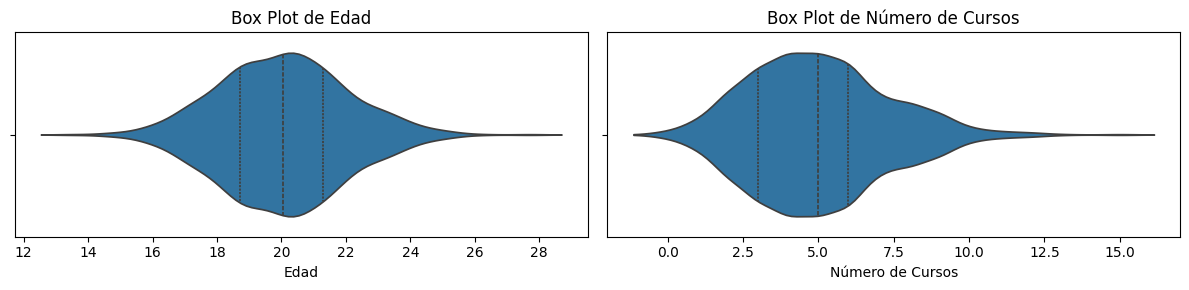

In [ ]:
# Crear visualizaciones
fig = plt.figure(figsize=(12, 3))

# Box plot para edad
plt.subplot(1, 2, 1)
sns.violinplot(x='edad', data=df, inner="quart")
plt.title('Box Plot de Edad')
plt.xlabel('Edad')

# Box plot para edad
plt.subplot(1, 2, 2)
sns.violinplot(x='num_cursos', data=df, inner="quart")
plt.title('Box Plot de Número de Cursos')
plt.xlabel('Número de Cursos')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de violín (violin plots) lado a lado:

**Gráfico izquierdo - "Box Plot de Edad"** representa la distribución de edades mediante una forma que combina densidad y rango. La parte más ancha (cerca de 20-21 años) indica donde se concentra la mayor parte de los datos. Las líneas verticales punteadas muestran probablemente la mediana (cerca de 20 años) y los cuartiles. El rango se extiende aproximadamente de 12 a 28 años, con forma más estrecha en los extremos. La distribución muestra cierta simetría, con un ligero sesgo positivo (cola más larga a la derecha).

**Gráfico derecho - "Box Plot de Número de Cursos":** muestra la distribución del número de cursos con el mismo formato de violín. La concentración mayor está alrededor de 5 cursos. Las líneas verticales punteadas marcan probablemente la mediana y cuartiles. El rango va aproximadamente de 0 a 15 cursos. Similar al gráfico de edad, muestra cierta simetría con un ligero sesgo positivo.

**Insights relevantes**

- Los gráficos de violín ofrecen mayor detalle sobre la densidad de datos que los box plots tradicionales, mostrando dónde se concentran las observaciones.
- La forma similar de ambas distribuciones sugiere patrones de comportamiento consistentes en la población estudiada.
- La distribución de edad confirma nuevamente una población principalmente de adultos jóvenes, mientras que la de cursos muestra una tendencia central clara con algunos casos alejados del promedio.
- Este tipo de visualización permite identificar no solo tendencias centrales sino también patrones en la dispersión de los datos.

 ## **9. Función de Probabilidad de Masa (PMF)**

 La función de probabilidad de masa es un concepto fundamental en la teoría de probabilidad y estadística, especialmente cuando trabajamos con variables aleatorias discretas. Basicamente permite conocer la probabilidad de que un numero discreto de eventos suceda.

 Características principales:
 - Solo está definida para valores discretos
 - P(X = x) ≥ 0 para todo x
 - La suma de todas las probabilidades es 1

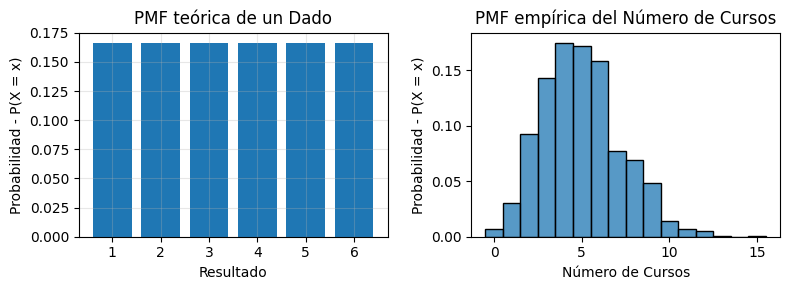

In [ ]:
# Visualizar PMF
# Ejemplo: teórico lanzamiento de un dado
x = np.arange(1, 7)
pmf = np.ones(6) / 6  # Probabilidad uniforme para cada resultado

fig = plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.bar(x, pmf)
plt.title('PMF teórica de un Dado')
plt.xlabel('Resultado')
plt.ylabel('Probabilidad - P(X = x)')
plt.xticks(x)
plt.grid(True, alpha=0.3)

# Ejemplo con datos discretos reales
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='num_cursos', stat='probability', discrete=True)
plt.title('PMF empírica del Número de Cursos')
plt.xlabel('Número de Cursos')
plt.ylabel('Probabilidad - P(X = x)')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de barras que representan funciones de masa de probabilidad (PMF).

**Gráfico izquierdo - "PMF teórica de un Dado"**

- Muestra la distribución de probabilidad para los resultados de un dado estándar (1-6)
- Todas las barras tienen exactamente la misma altura (aproximadamente 0.167 o 1/6)
- Representa una distribución uniforme donde cada resultado tiene igual probabilidad
- El eje Y indica la probabilidad P(X = x)

**Gráfico derecho - "PMF empírica del Número de Cursos"**

- Muestra la distribución de probabilidad observada para el número de cursos
- Las probabilidades más altas se concentran entre 5-7 cursos
- El pico máximo está en 6 cursos (probabilidad aproximada de 0.17)
- La forma general recuerda a una distribución normal o gaussiana
- El rango abarca de 0 a aproximadamente 15 cursos

**Insights relevantes**

- Se contrastan dos tipos fundamentales de distribuciones: uniforme (dado) versus empírica (cursos).
- Mientras el lanzamiento de un dado representa un proceso aleatorio con equiprobabilidad, el número de cursos muestra un patrón de concentración alrededor de valores centrales.
- El contraste entre ambas distribuciones ilustra perfectamente la diferencia entre procesos aleatorios teóricos y fenómenos del mundo real con tendencias centrales.

 ## **10. Función de Densidad de Probabilidad (PDF)**

 La función de densidad de probabilidad es el equivalente continuo de la PMF. Mientras que la PMF nos da probabilidades exactas para valores discretos, la PDF nos da la "densidad" de probabilidad en cada punto de un continuo.

 Características principales:
 * Es una función continua
 * El área bajo la curva es 1
 * f(x) ≥ 0 para todo x
 * P(a ≤ X ≤ b) = Integral de f(x) entre a y b

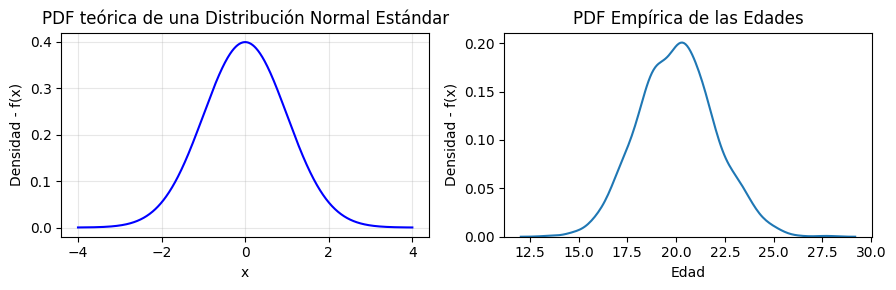

In [ ]:
# Visualizar PDF
# Ejemplo teórico: Distribución Normal
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x)

fig = plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-')
plt.title('PDF teórica de una Distribución Normal Estándar')
plt.xlabel('x')
plt.ylabel('Densidad - f(x)')
plt.grid(True, alpha=0.3)

# Ejemplo con datos reales
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='edad')
plt.title('PDF Empírica de las Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad - f(x)')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de funciones de densidad de probabilidad (PDF).

**Gráfico izquierdo - "PDF teórica de una Distribución Normal Estándar"**

- Muestra la curva de campana característica de la distribución normal estándar
- El eje X representa valores estandarizados (z) de -4 a 4
- El eje Y muestra la densidad de probabilidad, con pico máximo de 0.4 en x = 0
- La curva es perfectamente simétrica respecto al valor central (0)

**Gráfico derecho - "PDF Empírica de las Edades"**

- Representa la distribución de densidad de las edades observadas
- El eje X muestra edades reales desde aproximadamente 12.5 hasta 30 años
- El pico se encuentra aproximadamente a los 20 años (densidad ~0.20)
- La forma es similar a una campana pero con ligera asimetría (sesgo positivo)

**Insights relevantes**

- La comparación demuestra cómo los datos empíricos de edad se aproximan a una distribución normal, aunque no son perfectamente simétricos.
- Estas visualizaciones son fundamentales para modelar estadísticamente los datos y realizar inferencias sobre la población representada.

 ## **11. Función de Distribución Acumulada (CDF)**

 La función de distribución acumulada es una herramienta que nos permite calcular probabilidades para rangos de valores. Es especialmente útil cuando queremos saber la probabilidad de que una variable aleatoria sea menor o igual a un valor específico.

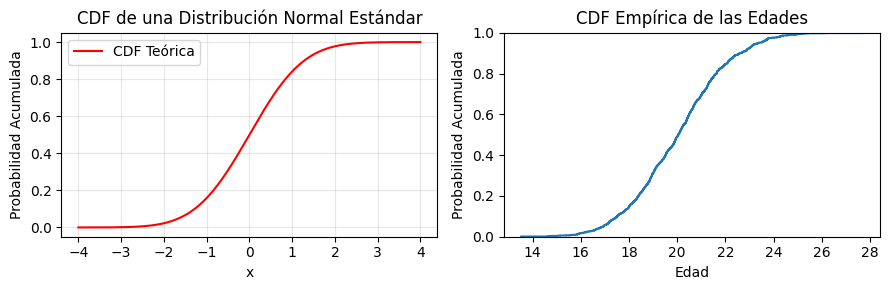

In [ ]:
# Visualizar CDF
# Ejemplo teórico: CDF Normal
x = np.linspace(-4, 4, 1000)
cdf = stats.norm.cdf(x)

fig = plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(x, cdf, 'r-', label='CDF Teórica')
plt.title('CDF de una Distribución Normal Estándar')
plt.xlabel('x')
plt.ylabel('Probabilidad Acumulada')
plt.grid(True, alpha=0.3)
plt.legend()

# Ejemplo con datos reales
plt.subplot(1, 2, 2)
sns.ecdfplot(data=df, x='edad')
plt.title('CDF Empírica de las Edades')
plt.xlabel('Edad')
plt.ylabel('Probabilidad Acumulada')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de funciones de distribución acumulada (CDF).

**Gráfico izquierdo - "CDF de una Distribución Normal Estándar"**

- Representa la probabilidad acumulada teórica de una distribución normal estándar
- El eje X muestra valores estandarizados (z) de -4 a 4
- El eje Y muestra la probabilidad acumulada de 0 a 1
- La curva tiene forma de S, alcanzando 0.5 en x = 0 (mediana)
- Se observa la simetría característica respecto al punto (0, 0.5)

**Gráfico derecho - "CDF Empírica de las Edades"**

- Muestra la distribución acumulada observada de las edades
- El eje X representa edades reales desde 14 hasta 28 años
- También con forma de S, pero ligeramente menos simétrica
- La pendiente más pronunciada entre 18-22 años indica mayor concentración de datos

**Insights relevantes**

- La CDF permite visualizar fácilmente percentiles - por ejemplo, aproximadamente el 50% de la población tiene menos de 20-21 años.
- Este tipo de visualización es especialmente útil para determinar umbrales y puntos de corte en análisis estadísticos.

 ## **12. Forma de una Distribución Estadística: Desviación Estándar, Sesgo y Curtosis**

 La forma de una distribución estadística nos proporciona información crucial sobre cómo se comportan nuestros datos. Más allá de las medidas de tendencia central (media, mediana, moda), existen tres medidas fundamentales que nos ayudan a caracterizar la forma de una distribución:

 * La desviación estándar (dispersión)
 * El sesgo (asimetría)
 * La curtosis (concentración)

 ### **12.1 Desviación Estándar (σ)**

 La desviación estándar es una medida de dispersión que nos indica cuánto tienden a alejarse los datos respecto a la media.

- Características principales:
 - Utiliza las mismas unidades que los datos originales
 - Es sensible a valores atípicos
 - Nos permite establecer intervalos de confianza

- Interpretación:
 - Aproximadamente el 68% de los datos caen dentro de ±1 desviación estándar de la media
 - Aproximadamente el 95% de los datos caen dentro de ±2 desviaciones estándar
 - Aproximadamente el 99.7% de los datos caen dentro de ±3 desviaciones estándar

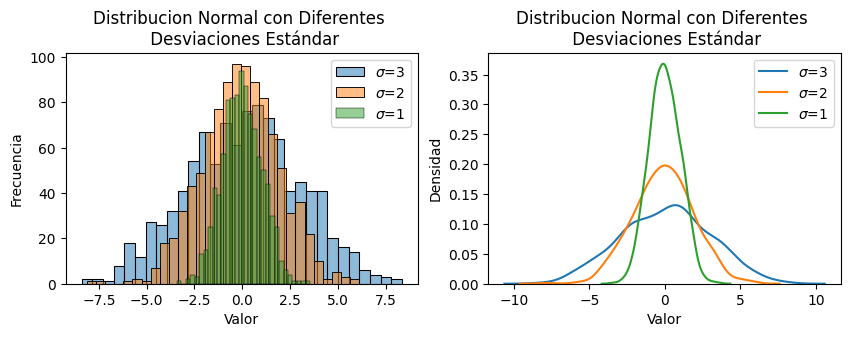

In [ ]:
# Generamos tres conjuntos de datos con diferentes dispersiones
datos_baja_dispersion = np.random.normal(loc=0, scale=1, size=1000)
datos_media_dispersion = np.random.normal(loc=0, scale=2, size=1000)
datos_alta_dispersion = np.random.normal(loc=0, scale=3, size=1000)

# Graficar las distribuciones histograma
fig = plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(x=datos_alta_dispersion, bins=30, alpha=0.5, label='$\sigma$=3')
sns.histplot(x=datos_media_dispersion, bins=30, alpha=0.5, label='$\sigma$=2')
sns.histplot(x=datos_baja_dispersion, bins=30, alpha=0.5, label='$\sigma$=1')
plt.title('Distribucion Normal con Diferentes \n Desviaciones Estándar')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

# Graficar las PDF
plt.subplot(1, 2, 2)
sns.kdeplot(x=datos_alta_dispersion, label='$\sigma$=3')
sns.kdeplot(x=datos_media_dispersion, label='$\sigma$=2')
sns.kdeplot(x=datos_baja_dispersion, label='$\sigma$=1')
plt.title('Distribucion Normal con Diferentes \n Desviaciones Estándar')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

plt.show()

 ### **12.2 Sesgo (Skewness)**

 El sesgo mide la asimetría de la distribución de probabilidad de una variable aleatoria respecto a su media.

Interpretación del sesgo:
 - Sesgo = 0: Distribución simétrica
 - Sesgo > 0: Distribución sesgada a la derecha (cola más larga a la derecha)
 - Sesgo < 0: Distribución sesgada a la izquierda (cola más larga a la izquierda)

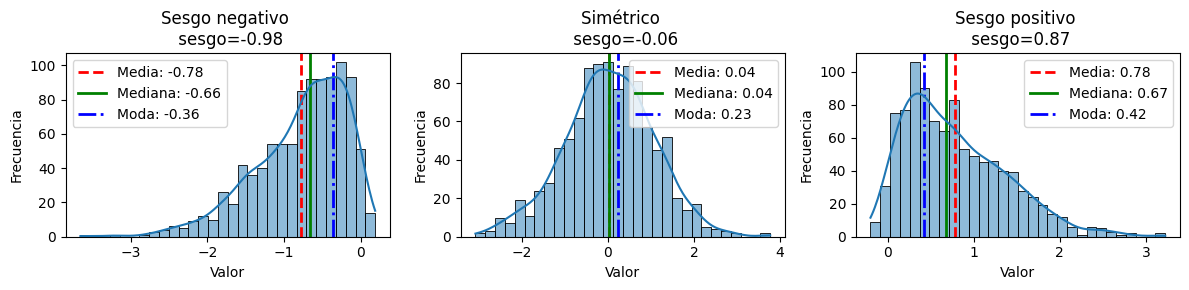

In [ ]:
# Generamos distribuciones con diferentes sesgos
datos_sesgo_neg = stats.skewnorm.rvs(a=-10, size=1000, random_state=42)
datos_simetricos = stats.norm.rvs(size=1000, random_state=25)
datos_sesgo_pos = stats.skewnorm.rvs(a=10, size=1000, random_state=32)

# Creamos la visualización
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Función para crear distribuciones con histograma
def plot_skewness(datos, ax, title):
    # Calcular media, mediana y moda
    mean = np.mean(datos)
    median = np.median(datos)
    _, counts = np.unique(datos, return_counts=True)
    index = np.argmax(counts)
    mode = datos[index]

    # Añadir líneas de media, mediana y moda
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Media: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Mediana: {median:.2f}')
    ax.axvline(mode, color='blue', linestyle='-.', linewidth=2, label=f'Moda: {mode:.2f}')

    # Configurar título y etiquetas
    sns.histplot(x=datos, bins=30, alpha=0.5, kde=True, ax=ax)
    ax.set_title(f'{title} \n sesgo={stats.skew(datos):.2f}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Creamos los tres gráficos
plot_skewness(datos_sesgo_neg, axes[0], 'Sesgo negativo')
plot_skewness(datos_simetricos, axes[1], 'Simétrico')
plot_skewness(datos_sesgo_pos, axes[2], 'Sesgo positivo')

plt.tight_layout()
plt.show()

 ### **12.3 Curtosis**

 La curtosis mide qué tan pesadas son las colas de una distribución en comparación con una distribución normal.

- Tipos de curtosis:
 - Mesocúrtica (curtosis = 3): Similar a la distribución normal
 - Leptocúrtica (curtosis > 3): Colas más pesadas, pico más pronunciado
 - Platicúrtica (curtosis < 3): Colas más ligeras, pico más plano

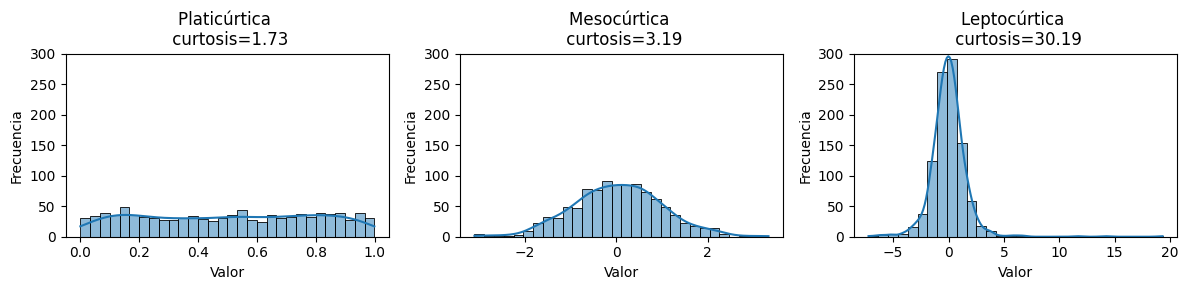

In [ ]:
# Generamos distribuciones con diferentes curtosis
datos_plati = np.random.uniform(size=1000)  # Platicúrtica
datos_meso = np.random.normal(size=1000)    # Mesocúrtica
datos_lepto = np.random.standard_t(df=3, size=1000)  # Leptocúrtica

# Creamos la visualización
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Función para crear distribuciones con histograma
def plot_kurtosis(datos, ax, title):
    sns.histplot(x=datos, bins=30, alpha=0.5, kde=True, ax=ax)
    ax.set_title(f'{title} \n curtosis={stats.kurtosis(datos, fisher=False):.2f}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.set_ylim([0, 300])

# Creamos los tres gráficos
plot_kurtosis(datos_plati, axes[0], 'Platicúrtica')
plot_kurtosis(datos_meso, axes[1], 'Mesocúrtica')
plot_kurtosis(datos_lepto, axes[2], 'Leptocúrtica')

plt.tight_layout()
plt.show()

 ## **13. Correlaciones: Pearson y Spearman**

 La correlación es una medida estadística que cuantifica la relación entre dos variables. En esta lectura, nos centraremos en dos de los coeficientes de correlación más utilizados:

 * Correlación de Pearson: mide la fuerza y dirección de la relación lineal entre variables
 * Correlación de Spearman: mide la fuerza y dirección de la relación monótona entre variables

 Ambos coeficientes varían entre -1 y 1, donde:
 * 1 indica una correlación positiva perfecta
 * -1 indica una correlación negativa perfecta
 * 0 indica ausencia de correlación

 ### **13.1 Correlación de Pearson**

 La correlación de Pearson (r) mide la fuerza de la relación lineal entre dos variables continuas.

- Características principales:
 * Asume una relación lineal entre las variables
 * Es sensible a valores atípicos
 * Requiere que las variables sean continuas
 * No distingue entre variables dependientes e independientes

- Interpretación general:
 * r > 0: Correlación positiva
 * r < 0: Correlación negativa
 * |r| > 0.7: Correlación fuerte
 * 0.3 < |r| < 0.7: Correlación moderada
 * |r| < 0.3: Correlación débil

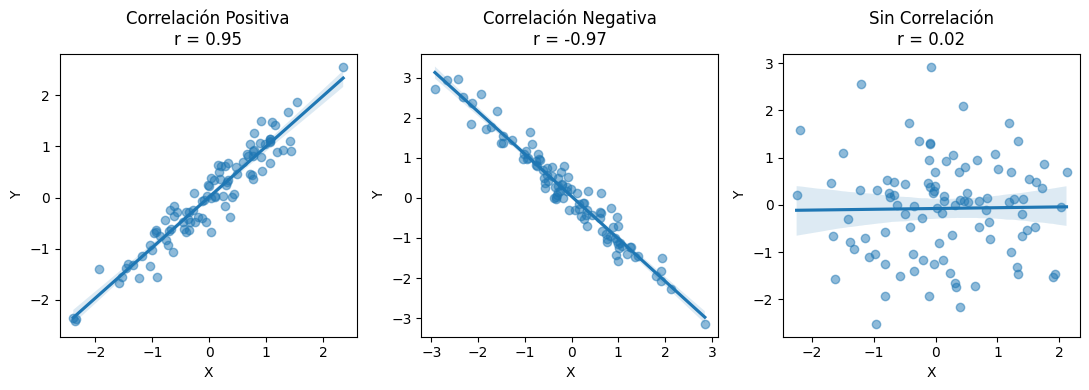

In [ ]:
# Generamos datos con diferentes tipos de correlaciones de Pearson
n = 100

# Correlación positiva fuerte
x_pos = np.random.normal(0, 1, n)
y_pos = x_pos + np.random.normal(0, 0.3, n)

# Correlación negativa fuerte
x_neg = np.random.normal(0, 1, n)
y_neg = -x_neg + np.random.normal(0, 0.3, n)

# Sin correlación
x_none = np.random.normal(0, 1, n)
y_none = np.random.normal(0, 1, n)

# Creamos la visualización
fig, axes = plt.subplots(1, 3, figsize=(11, 4))

# Función para crear scatter plots con línea de regresión
def plot_correlation(x, y, ax, title):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.5})
    corr = stats.pearsonr(x, y)[0]
    ax.set_title(f'{title}\nr = {corr:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Creamos los tres gráficos
plot_correlation(x_pos, y_pos, axes[0], 'Correlación Positiva')
plot_correlation(x_neg, y_neg, axes[1], 'Correlación Negativa')
plot_correlation(x_none, y_none, axes[2], 'Sin Correlación')

plt.tight_layout()
plt.show()

 ### **13.2 Correlación de Spearman**

 La correlación de Spearman (ρ) mide la fuerza y dirección de la relación monótona entre dos variables.

- Características principales:
 * No asume linealidad
 * Es resistente a valores atípicos
 * Puede usarse con variables ordinales
 * Se basa en rangos, no en valores directos

- Ventajas sobre Pearson:
 * Detecta relaciones monótonas no lineales
 * Más robusta ante valores atípicos
 * Aplicable a datos ordinales

 - Interpretación general:
 * 0.00 < ρ < 0.20: Correlación despreciable
 * 0.21 < ρ < 0.40: Correlación débil
 * 0.41 < ρ < 0.60: Correlación moderada
 * 0.61 < ρ < 0.80: Correlación fuerte
 * 0.81 < ρ < 1.00: Correlación muy fuerte


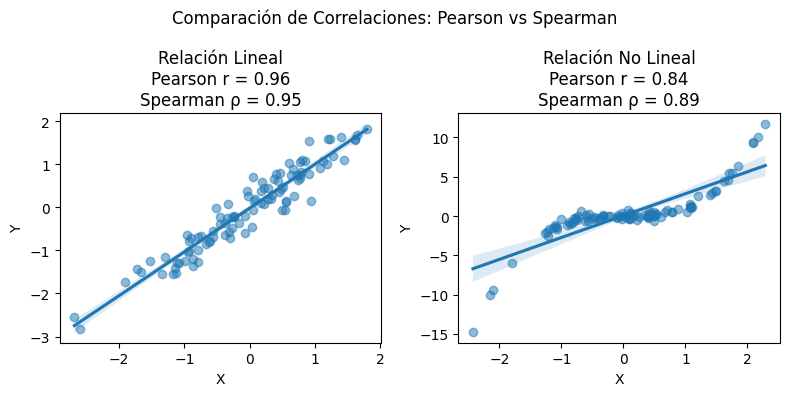

In [ ]:
# Generamos datos para comparar Pearson y Spearman
n = 100

# Relación lineal
x_linear = np.random.normal(0, 1, n)
y_linear = x_linear + np.random.normal(0, 0.3, n)

# Relación monótona no lineal
x_nonlinear = np.random.normal(0, 1, n)
y_nonlinear = x_nonlinear**3 + np.random.normal(0, 0.3, n)

# Creamos la visualización
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Comparación de Correlaciones: Pearson vs Spearman')

# Función para plotear y mostrar ambas correlaciones
def plot_both_correlations(x, y, ax, title):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.5})
    pearson_r = stats.pearsonr(x, y)[0]
    spearman_r = stats.spearmanr(x, y)[0]
    ax.set_title(f'{title}\nPearson r = {pearson_r:.2f}\nSpearman ρ = {spearman_r:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plot_both_correlations(x_linear, y_linear, axes[0], 'Relación Lineal')
plot_both_correlations(x_nonlinear, y_nonlinear, axes[1], 'Relación No Lineal')

plt.tight_layout()
plt.show()

La imagen muestra dos gráficos de dispersión que comparan diferentes tipos de correlaciones.

**Insights relevantes**

- El coeficiente de Pearson funciona óptimamente en relaciones lineales, mientras que Spearman puede capturar mejor relaciones monótonas no lineales
- En el caso no lineal, Spearman (0.89) es mayor que Pearson (0.84), lo que demuestra su mayor robustez ante relaciones no lineales.
- Para relaciones perfectamente lineales, ambos coeficientes tienden a valores similares, como se ve en el primer gráfico.
- Esta comparación ilustra perfectamente la importancia de elegir el coeficiente adecuado según el tipo de relación entre variables.
- Visualizar los datos antes de calcular correlaciones es esencial para interpretar correctamente los resultados estadísticos.

 ### **13.3 Matriz de Correlaciones**

 La matriz de correlaciones es una herramienta útil para visualizar las correlaciones entre múltiples variables simultáneamente.

- Características:
 * Matriz simétrica
 * Diagonal siempre igual a 1
 * Útil para identificar patrones de correlación
 * Puede visualizarse como heatmap

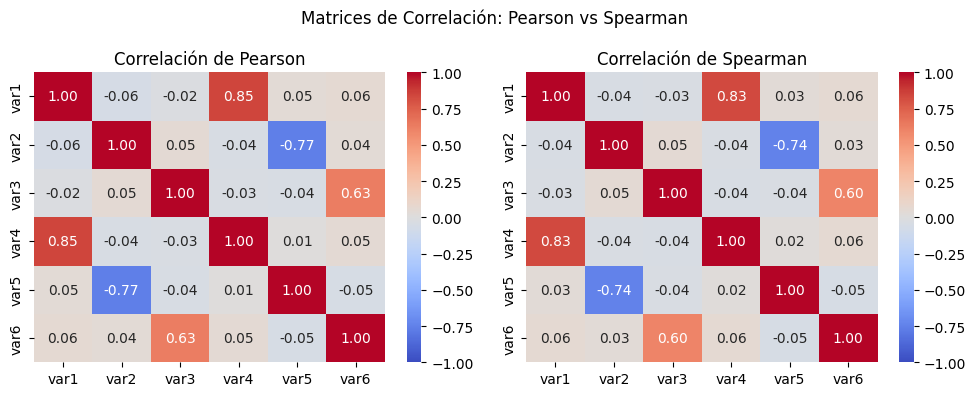

In [ ]:
# Creamos un dataset con múltiples variables correlacionadas
n = 1000
df = pd.DataFrame({
    'var1': np.random.normal(0, 1, n),
    'var2': np.random.normal(0, 1, n),
    'var3': np.random.normal(0, 1, n)
})

# Añadimos algunas correlaciones
df['var4'] = df['var1'] * 0.8 + np.random.normal(0, 0.5, n)
df['var5'] = -df['var2'] * 0.6 + np.random.normal(0, 0.5, n)
df['var6'] = df['var3'] * 0.4 + np.random.normal(0, 0.5, n)

# Calculamos y visualizamos las matrices de correlación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Matrices de Correlación: Pearson vs Spearman')

# Pearson
pearson_corr = df.corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1, fmt=".2f")
ax1.set_title('Correlación de Pearson')

# Spearman
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2, fmt=".2f")
ax2.set_title('Correlación de Spearman')

plt.tight_layout()
plt.show()

La imagen muestra dos matrices de correlación para las mismas seis variables (var1 a var6), comparando coeficientes de Pearson (izquierda) y Spearman (derecha).

- Ambas matrices utilizan una escala de color donde el rojo intenso indica correlaciones positivas fuertes (cercanas a 1), el azul intenso indica correlaciones negativas fuertes (cercanas a -1), y los tonos claros indican correlaciones débiles.
- La diagonal principal muestra valores de 1.00 en ambas matrices, representando la perfecta correlación de cada variable consigo misma.
- Se observan patrones similares en ambas matrices, con ligeras diferencias en los valores numéricos.

**Insights relevantes**

- Las correlaciones más fuertes se mantienen consistentes en ambos métodos: destacan la correlación positiva entre var1 y var4 (Pearson: 0.85, Spearman: 0.83) y la correlación negativa entre var2 y var5 (Pearson: -0.77, Spearman: -0.74).
- Los valores de Spearman tienden a ser ligeramente más conservadores que los de Pearson, lo que puede indicar presencia de algunas relaciones no perfectamente lineales o posibles valores atípicos que afectan más al coeficiente de Pearson.
- La consistencia general entre ambas matrices sugiere que la mayoría de las relaciones entre estas variables son aproximadamente lineales, ya que no se observan diferencias drásticas entre los dos métodos de correlación.

 ## **14. Links de interes**
 - **Libreria Seaborn para visualización:** https://seaborn.pydata.org/index.html

